# Random Variables

In this blog, I am trying to give an introduction to random variables and follow up with an implementation of random numbers in python.

But first, **what is a random variable?**

There are multip definitions to random variables depending on the context. The main purpose of using random variables are so that we can define certain probability functions to make it convinient and easy to compute the probabilitiesf certain events. Consider a random experiment with a sample space $\Gamma $

A random variable X($\xi$) is a single valued real function that assigns a real number to each sample point $\xi$ of $\Gamma$. In other words, a random variable is **not a variable but a function**. Okay, let's take a simple example.

Imagine a toss of a coin and we only do it once. Now, we can define a random variable X as below;


                        X(H) = 1, X(T) = 0

What just happened there? Let's breakit down. Now, our sample space $\Gamma$ consist of two random events; H and T, where H is for heads and T is for tails. So, our random variable X is just a function that assigns real values for those events. Let's define two other random variables Y, and Z. We can define them as below;

                        Y(H) = 0, Y(T) = 1
                        Z(H) = 0, Z(T) = 0

So finally, if X is arandom variable and x is a fixed number, we can define the event (X=x) as:

(X = x) = {$\xi$: X($\xi$) = x}

which is read as a set of all the events in a particular sample space such that X($\xi$) is equal to x. One other thing to notice is that each random variable has its own distribution and they assign real values according to their respective distriutions.

So, now with the background knowledge of the random variables, let's see how to generate random numbers in python. Random generators in python are like random variables. Each time we call them, they give us a real value.

However, unfortunately, there is no way of creating random numbers with software, rather we generate pseudo random numbers. Pseudo random number generators are used to generate lots and lots of random numbers rather than just one random number. The following implementation of the randomnumber generator is based on Wichmann Hill algorithm.

A pseudo number generator is a mathematical function that we can call and each time we call it, it will generate a number that looks random. 

In [1]:
rnd_state = None

def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

The key thing to understand here is the global variable _rnd_state_. Let's get some outputs for _rnd_state_;

In [2]:
seed(76216435476523170)
rnd_state

(543, 10388, 5335)

_rnd-state_ now contains three numbers.The seed we passed here is just a random seed that I smashed on the keyboard. Now, we pass this _rnd_state_ to the following function that generates pseudo random numbers.

In [3]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x, y, z
    return (x/30269 + y/30307 + z/30323) % 1.0

Now we can call the rand() function multiple times and it will generate different pseudo random numbers each time;

In [4]:
rand(), rand(), rand()

(0.931798407488099, 0.3824530849180521, 0.9459261819993035)

So now we have a pseudo random number generator that we can call to generate random numbers!!!!!

Let's check whether we get different numbers if we call say 50 times.

In [5]:
from matplotlib import pyplot as plt

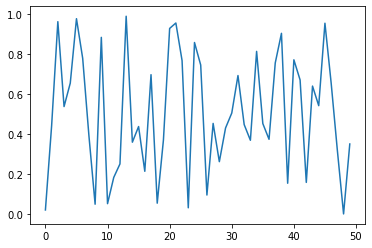

In [6]:
plt.plot([rand() for _ in range(50)])

It does!! One other thing to notice is that all the random numebrs are normalized to 1. If you take a closer look at the return statement in the rand() function,you will see that we take the modulo of 1 which makes sense for the generated results. So, if our function works, if we plot the histogram of results for a lots and lots of generated numbers, it should contain all the values between 0 and 1. Let's see that as well;

(array([ 99852.,  99946., 100376., 100087.,  99555.,  99533., 100245.,
        100235.,  99813., 100358.]),
 array([1.24317537e-07, 1.00000093e-01, 2.00000062e-01, 3.00000031e-01,
        4.00000000e-01, 4.99999969e-01, 5.99999938e-01, 6.99999907e-01,
        7.99999876e-01, 8.99999845e-01, 9.99999814e-01]),
 <a list of 10 Patch objects>)

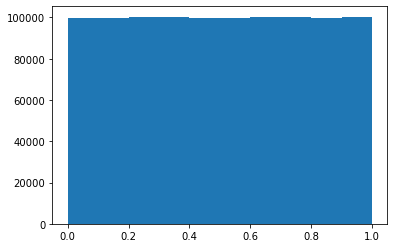

In [7]:
plt.hist([rand() for _ in range (1000000)])

Hoorayyy!! It works too!!!